# (1) BUSINESS UNDERSTANDING

(1.1) PROJECT OVERVIEW

In response to the growing trend of original video content production in the entertainment industry, Microsoft has decided to venture into the movie industry by establishing its own movie studio. This strategic move aims to tap into the lucrative world of cinema and streaming platforms. However, Microsoft's entry into the movie business comes with a significant challenge: They lack prior experience in the film production. The success of their new movie studio hinges on making well-informed decisons about the types of films to create, ensuring they resonate with audiances and generate substantial box office returns.

(1.2) BUSINESS PROBLEM

Microsoft's primary business problem is the lack of knowledge and understanding regarding the types of films that currently perform well at the box office. To address this challenge, our goal is to leverage exploratory data analysis (EDA) to gain insights into the characteristics and factors that contribute to the success of movies in the industry. These insights will be translated into actionable recommendations that will guide Microsoft's new movie studio in making informed decisions about the types of films to produce.

(1.3) KEY OBJECTIVES

a) Identify the key factors influencing the success of movies at the box office

b) Explore trends in the movie genres, budgets and revenue overtime

c) Dtermine which genres have consistently performed well in terms of box office revenue

d) Provide actionable insights and recommendations to assist Microsoft's new movie studio in shaping its film production strategy

(1.4) STAKEHOLDERS

a) Head of Microsoft's new movie studio

b) Microsoft's executive leadership team

c) Data analysts and researchers involved in the project

(1.5) EXPECTED OUTCOMES

By the end of this project, we aim to provide the head of Microsoft's new movie studio with clear understanding of the movie industry's current landscape. This understanding will enable informed decision-making regarding the types of films that are likely to perform well in terms of box office success. The insights generated through EDA will contribute to the strategic planning and success of Microsoft's venture into the movie business.

# (2) DATA PREPARATION¶

(2.1) IMPORTING LIBRARIES

In [58]:
import pandas as pd
import numpy as np
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt

(2.2) LOADING THE DATASETS

first DataFrame

In [59]:
df = pd.read_csv("bom.movie_gross.csv")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Second DataFrame

In [60]:
conn = sqlite3.connect("im.db")
conn

third DataFrame

In [61]:
df = pd.read_csv("tn.movie_budgets.csv")
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


(2.3) QUERYING TABLES MOVIE_BASICS AND MOVIE_RATINGS FROM ("IM.DB")


querying the tables of Database ("im.db")

In [62]:
#querying the tables of the database

# Create a connection to the SQLite database
conn = sqlite3.connect("im.db")

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Query the "sqlite_master" table to get a list of all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all the table names
    table_names = cursor.fetchall()

    # Print the list of table names
    for table in table_names:
        print("Table Name:", table[0])

except sqlite3.Error as e:
    print("SQLite error:", e)

finally:
    # Close the cursor and the connection
    cursor.close()
    conn.close()


Table Name: movie_basics
Table Name: directors
Table Name: known_for
Table Name: movie_akas
Table Name: movie_ratings
Table Name: persons
Table Name: principals
Table Name: writers


querying tables movie_basics and movie_ratings


In [63]:
# Create a connection to the SQLite database
conn = sqlite3.connect("im.db")

try:
    # Define the tables you want to retrieve
    tables_to_retrieve = ["movie_basics", "movie_ratings"]

    dataframes = {}  # Dictionary to store DataFrames

    for table_name in tables_to_retrieve:
        # Read data from the table into a DataFrame
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql_query(query, conn)

        # Store the DataFrame in the dictionary with the table name as the key
        dataframes[table_name] = df

except sqlite3.Error as e:
    print("SQLite error:", e)

finally:
    # Close the connection
    conn.close()

# Access the DataFrames using their respective keys
movie_basics_df = dataframes["movie_basics"]
movie_ratings_df = dataframes["movie_ratings"]


In [64]:
movie_basics_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [65]:
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


(2.4) comining movie_basics and movie_ratings tables

In [66]:
# Create a new DataFrame by concatenating the two DataFrames along rows (axis=0)
combined_df = pd.concat([movie_basics_df, movie_ratings_df], axis=0)

# Reset the index to ensure a continuous index in the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print(combined_df)




         movie_id                    primary_title  \
0       tt0063540                        Sunghursh   
1       tt0066787  One Day Before the Rainy Season   
2       tt0069049       The Other Side of the Wind   
3       tt0069204                  Sabse Bada Sukh   
4       tt0100275         The Wandering Soap Opera   
...           ...                              ...   
219995  tt9805820                              NaN   
219996  tt9844256                              NaN   
219997  tt9851050                              NaN   
219998  tt9886934                              NaN   
219999  tt9894098                              NaN   

                    original_title  start_year  runtime_minutes  \
0                        Sunghursh      2013.0            175.0   
1                  Ashad Ka Ek Din      2019.0            114.0   
2       The Other Side of the Wind      2018.0            122.0   
3                  Sabse Bada Sukh      2018.0              NaN   
4            La 

In [67]:
combined_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN
...,...,...,...,...,...,...,...,...
219995,tt9805820,NaN,NaN,NaN,NaN,NaN,8.1,25.0
219996,tt9844256,NaN,NaN,NaN,NaN,NaN,7.5,24.0
219997,tt9851050,NaN,NaN,NaN,NaN,NaN,4.7,14.0
219998,tt9886934,NaN,NaN,NaN,NaN,NaN,7.0,5.0


In [68]:
# Create a connection to the SQLite database
conn = sqlite3.connect("im.db")

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Query the "sqlite_master" table to get a list of all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all the table names
    table_names = cursor.fetchall()

    # Define the tables you want to retrieve
    tables_to_retrieve = ["movie_basics", "movie_ratings"]

    # Loop through the list of table names and print only the specified tables
    for table in table_names:
        table_name = table[0]
        if table_name in tables_to_retrieve:
            print("Table Name:", table_name)

except sqlite3.Error as e:
    print("SQLite error:", e)

finally:
    # Close the cursor and the connection
    cursor.close()
    conn.close()

  



Table Name: movie_basics
Table Name: movie_ratings


(2.5) merging the "bom.movie_gross.csv" to the combined_df 

In [69]:
# Merge the DataFrames on 'movie_id'
merged_combined_df = pd.merge(combined_df, df, on='movie_id', how='inner')

# Display the merged DataFrame
print(merged_combined_df)









         movie_id                    primary_title  \
0       tt0063540                        Sunghursh   
1       tt0063540                              NaN   
2       tt0066787  One Day Before the Rainy Season   
3       tt0066787                              NaN   
4       tt0069049       The Other Side of the Wind   
...           ...                              ...   
147707  tt9914642                              NaN   
147708  tt9914942       La vida sense la Sara Amat   
147709  tt9914942                              NaN   
147710  tt9916160                       Drømmeland   
147711  tt9916160                              NaN   

                    original_title  start_year  runtime_minutes  \
0                        Sunghursh      2013.0            175.0   
1                              NaN         NaN              NaN   
2                  Ashad Ka Ek Din      2019.0            114.0   
3                              NaN         NaN              NaN   
4       The Othe

In [70]:
merged_combined_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_x,numvotes_x,averagerating_y,numvotes_y
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,7.0,77
1,tt0063540,NaN,NaN,NaN,NaN,NaN,7.0,77.0,7.0,77
2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN,7.2,43
3,tt0066787,NaN,NaN,NaN,NaN,NaN,7.2,43.0,7.2,43
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN,6.9,4517
...,...,...,...,...,...,...,...,...,...,...
147707,tt9914642,NaN,NaN,NaN,NaN,NaN,8.5,8.0,8.5,8
147708,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019.0,NaN,None,NaN,NaN,6.6,5
147709,tt9914942,NaN,NaN,NaN,NaN,NaN,6.6,5.0,6.6,5
147710,tt9916160,Drømmeland,Drømmeland,2019.0,72.0,Documentary,NaN,NaN,6.5,11


(2.6) MERGING ("TN.MOVIE_BUDGETS.CSV") WITH MERGED_COMBINED_DF

In [71]:
# Merge the new dataset (df) with the previously merged DataFrame (merged_combined_df) based on movie titles
df = pd.read_csv("tn.movie_budgets.csv")
final_merged_df = pd.merge(merged_combined_df, df, left_on='primary_title', right_on='movie', how='inner')

# Drop the duplicate 'movie' column from the merged DataFrame
final_merged_df.drop(columns=['movie'], inplace=True)

# Display the final merged DataFrame
print(final_merged_df)


       movie_id  primary_title original_title  start_year  runtime_minutes  \
0     tt0249516     Foodfight!     Foodfight!      2012.0             91.0   
1     tt0326592  The Overnight  The Overnight      2010.0             88.0   
2     tt3844362  The Overnight  The Overnight      2015.0             79.0   
3     tt0337692    On the Road    On the Road      2012.0            124.0   
4     tt4339118    On the Road    On the Road      2014.0             89.0   
...         ...            ...            ...         ...              ...   
2870  tt8680254    Richard III    Richard III      2016.0              NaN   
2871  tt8824064         Heroes         Heroes      2019.0             88.0   
2872  tt8976772           Push           Push      2019.0             92.0   
2873  tt9024106      Unplanned      Unplanned      2019.0            106.0   
2874  tt9248762  The Terrorist  The Terrorist      2018.0              NaN   

                       genres  averagerating_x  numvotes_x  ave

In [72]:
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_x,numvotes_x,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",NaN,NaN,1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,NaN,NaN,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",NaN,NaN,6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",NaN,NaN,6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,NaN,NaN,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,NaN,NaN,9.1,28,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,NaN,NaN,7.3,7,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,NaN,NaN,7.3,33,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",NaN,NaN,6.3,5945,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


# (3.0) DATA UNDERSTANDING

In [73]:
#checking top of the dataset
final_merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_x,numvotes_x,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",NaN,NaN,1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,NaN,NaN,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",NaN,NaN,6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",NaN,NaN,6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,NaN,NaN,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"


In [74]:
#checking the bottom of the dataset
final_merged_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_x,numvotes_x,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,NaN,NaN,9.1,28,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,NaN,NaN,7.3,7,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,NaN,NaN,7.3,33,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",NaN,NaN,6.3,5945,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"
2874,tt9248762,The Terrorist,The Terrorist,2018.0,NaN,Thriller,NaN,NaN,6.0,6,48,"Jan 14, 2000","$25,000","$195,043","$195,043"


In [75]:
#informtion of the dataset
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   float64
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating_x    0 non-null      float64
 7   numvotes_x         0 non-null      float64
 8   averagerating_y    2875 non-null   float64
 9   numvotes_y         2875 non-null   int64  
 10  id                 2875 non-null   int64  
 11  release_date       2875 non-null   object 
 12  production_budget  2875 non-null   object 
 13  domestic_gross     2875 non-null   object 
 14  worldwide_gross    2875 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 359.4+ KB


In [76]:
#checking number of entries in each column
final_merged_df.count()

movie_id             2875
primary_title        2875
original_title       2875
start_year           2875
runtime_minutes      2757
genres               2867
averagerating_x         0
numvotes_x              0
averagerating_y      2875
numvotes_y           2875
id                   2875
release_date         2875
production_budget    2875
domestic_gross       2875
worldwide_gross      2875
dtype: int64

In [77]:
#describing the dataset
final_merged_df.describe

<bound method NDFrame.describe of        movie_id  primary_title original_title  start_year  runtime_minutes  \
0     tt0249516     Foodfight!     Foodfight!      2012.0             91.0   
1     tt0326592  The Overnight  The Overnight      2010.0             88.0   
2     tt3844362  The Overnight  The Overnight      2015.0             79.0   
3     tt0337692    On the Road    On the Road      2012.0            124.0   
4     tt4339118    On the Road    On the Road      2014.0             89.0   
...         ...            ...            ...         ...              ...   
2870  tt8680254    Richard III    Richard III      2016.0              NaN   
2871  tt8824064         Heroes         Heroes      2019.0             88.0   
2872  tt8976772           Push           Push      2019.0             92.0   
2873  tt9024106      Unplanned      Unplanned      2019.0            106.0   
2874  tt9248762  The Terrorist  The Terrorist      2018.0              NaN   

                       genres

In [78]:
#checking the columns of the dataset
final_merged_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating_x', 'numvotes_x',
       'averagerating_y', 'numvotes_y', 'id', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

# (4.0) DATA CLEANING

(4.1) CHECKING NULLS

In [79]:
final_merged_df.isnull().values.any()

True

In [80]:
#calculate the total number of null values
null_count = final_merged_df.isnull().sum()
null_count

movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes       118
genres                  8
averagerating_x      2875
numvotes_x           2875
averagerating_y         0
numvotes_y              0
id                      0
release_date            0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [81]:
#calculate the total number of values (non_null)
total_count = final_merged_df.shape[0]
total_count

2875

In [82]:
#calculatepercentage of nulls in each column
null_percentage = (null_count/total_count)*100
print(null_percentage)

movie_id               0.000000
primary_title          0.000000
original_title         0.000000
start_year             0.000000
runtime_minutes        4.104348
genres                 0.278261
averagerating_x      100.000000
numvotes_x           100.000000
averagerating_y        0.000000
numvotes_y             0.000000
id                     0.000000
release_date           0.000000
production_budget      0.000000
domestic_gross         0.000000
worldwide_gross        0.000000
dtype: float64


In [83]:
#droping columns that have 100% missing values
final_merged_df.dropna(axis=1, how='all', inplace=True)
final_merged_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,9.1,28,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,7.3,7,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,7.3,33,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [84]:
#filling the runtime_minutes with the mean value
final_merged_df['runtime_minutes'].fillna(final_merged_df['runtime_minutes'].mean(), inplace=True)
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.000000,None,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.000000,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.000000,Drama,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,102.945956,Drama,9.1,28,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.000000,Documentary,7.3,7,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.000000,Documentary,7.3,33,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.000000,"Biography,Drama",6.3,5945,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [85]:
#imputating the genre column with the mode
final_merged_df['genres'].fillna(final_merged_df['genres'].mode()[0], inplace=True)
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.000000,Drama,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.000000,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.000000,Drama,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,102.945956,Drama,9.1,28,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.000000,Documentary,7.3,7,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.000000,Documentary,7.3,33,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.000000,"Biography,Drama",6.3,5945,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [86]:
final_merged_df.isnull().values.any()

False

(4.2) CHECKING DUPLICATES

In [87]:
final_merged_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2870    False
2871    False
2872    False
2873    False
2874    False
Length: 2875, dtype: bool

(4.3) CHECKING FOR OUTLIERS

In [88]:
import pandas as pd

# Assuming 'final_merged_df' is your DataFrame with both numerical and categorical columns

# Define a function to detect outliers using IQR for numerical columns
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each numerical column
numerical_columns = final_merged_df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    outliers = detect_outliers_iqr(final_merged_df, column)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)

# Detect outliers for the categorical column based on the count of each category
categorical_column = 'genres'  # Replace with your categorical column name
category_counts = final_merged_df[categorical_column].value_counts()
threshold = 10  # Adjust the threshold as needed
categorical_outliers = final_merged_df[final_merged_df[categorical_column].isin(category_counts[category_counts <= threshold].index)]
if not categorical_outliers.empty:
    print(f"Outliers in {categorical_column}:")
    print(categorical_outliers)



Outliers in runtime_minutes:
       movie_id     primary_title    original_title  start_year  \
22    tt0443272           Lincoln           Lincoln      2012.0   
39    tt0466893          Margaret          Margaret      2011.0   
58    tt0490215           Silence           Silence      2016.0   
73    tt1709105             Drive             Drive      2010.0   
101   tt0816692      Interstellar      Interstellar      2014.0   
...         ...               ...               ...         ...   
2659  tt4876464   Rosemary's Baby   Rosemary's Baby      2015.0   
2680  tt5074352            Dangal            Dangal      2016.0   
2688  tt5138210   Good Luck Chuck   Good Luck Chuck      2016.0   
2741  tt5897302       Slender Man       Slender Man      2013.0   
2857  tt8043306  Teefa in Trouble  Teefa in Trouble      2018.0   

      runtime_minutes                   genres  averagerating_y  numvotes_y  \
22              150.0  Biography,Drama,History              7.4      228701   
39      

In [89]:
#handle outliers
from scipy.stats.mstats import winsorize

# Define the lower and upper quantile thresholds
lower_threshold = 0.01  # You can adjust this threshold
upper_threshold = 0.99  # You can adjust this threshold

# Loop through the columns and winsorize the data
for column in final_merged_df.columns:
    if final_merged_df[column].dtype in ['int64', 'float64']:
        # Check if the column contains numerical data (you can customize this condition)
        winsorized_data = winsorize(final_merged_df[column], limits=(lower_threshold, upper_threshold))
        final_merged_df[column] = winsorized_data


In [90]:
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2010.0,52.0,"Action,Animation,Comedy",2.9,5,2,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,52.0,Drama,2.9,5,2,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2010.0,52.0,"Comedy,Mystery",2.9,5,2,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2010.0,52.0,"Adventure,Drama,Romance",2.9,5,2,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2010.0,52.0,Drama,2.9,5,2,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2010.0,52.0,Drama,2.9,5,2,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2010.0,52.0,Documentary,2.9,5,2,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2010.0,52.0,Documentary,2.9,5,2,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2010.0,52.0,"Biography,Drama",2.9,5,2,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


(4.4) DATA DECISION


I will focus on movies with production_budget and a worldwide gross revenue of at least $10 million.



In [91]:
# Convert 'production_budget' and 'worldwide_gross' to numeric (if not already)
final_merged_df['production_budget'] = pd.to_numeric(final_merged_df['production_budget'].str.replace('[\$,]', '', regex=True), errors='coerce')
final_merged_df['worldwide_gross'] = pd.to_numeric(final_merged_df['worldwide_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Remove rows with missing values in 'production_budget' or 'worldwide_gross'
final_merged_df = final_merged_df.dropna(subset=['production_budget', 'worldwide_gross'])

# Filter the DataFrame for movies with production budget and worldwide gross >= $10 million
filtered_df = final_merged_df[(final_merged_df['production_budget'] >= 10_000_000) & (final_merged_df['worldwide_gross'] >= 10_000_000)]




In [92]:
filtered_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2010.0,52.0,"Adventure,Comedy,Drama",2.9,5,2,"Dec 25, 2013",91000000,"$58,236,838",187861183
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2010.0,52.0,"Action,Crime,Drama",2.9,5,2,"Sep 19, 2014",28000000,"$26,017,685",62108587
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5,2,"Jun 12, 2015",215000000,"$652,270,625",1648854864
9,tt0376136,The Rum Diary,The Rum Diary,2010.0,52.0,"Comedy,Drama",2.9,5,2,"Oct 28, 2011",45000000,"$13,109,815",21544732
10,tt0383010,The Three Stooges,The Three Stooges,2010.0,52.0,"Comedy,Family",2.9,5,2,"Apr 13, 2012",30000000,"$44,338,224",54052249
12,tt0398286,Tangled,Tangled,2010.0,52.0,"Adventure,Animation,Comedy",2.9,5,2,"Nov 24, 2010",260000000,"$200,821,936",586477240
13,tt0401729,John Carter,John Carter,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5,2,"Mar 9, 2012",275000000,"$73,058,679",282778100
15,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010.0,52.0,Comedy,2.9,5,2,"Jul 30, 2010",69000000,"$73,026,337",86796502
16,tt0429493,The A-Team,The A-Team,2010.0,52.0,"Action,Adventure,Thriller",2.9,5,2,"Jun 11, 2010",110000000,"$77,222,099",177241171
17,tt0431021,The Possession,The Possession,2010.0,52.0,"Horror,Mystery,Thriller",2.9,5,2,"Aug 31, 2012",14000000,"$49,130,588",82925064


In [93]:
# Create a copy of the filtered DataFrame
filtered_df_copy = filtered_df.copy()

# Calculate the profit and assign it to the copy
filtered_df_copy['profit'] = filtered_df_copy['worldwide_gross'] - filtered_df_copy['production_budget']


filtered_df_copy.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2010.0,52.0,"Adventure,Comedy,Drama",2.9,5,2,"Dec 25, 2013",91000000,"$58,236,838",187861183,96861183
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2010.0,52.0,"Action,Crime,Drama",2.9,5,2,"Sep 19, 2014",28000000,"$26,017,685",62108587,34108587
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5,2,"Jun 12, 2015",215000000,"$652,270,625",1648854864,1433854864
9,tt0376136,The Rum Diary,The Rum Diary,2010.0,52.0,"Comedy,Drama",2.9,5,2,"Oct 28, 2011",45000000,"$13,109,815",21544732,-23455268
10,tt0383010,The Three Stooges,The Three Stooges,2010.0,52.0,"Comedy,Family",2.9,5,2,"Apr 13, 2012",30000000,"$44,338,224",54052249,24052249


In [94]:
# Calculate profit and add it as a new column
filtered_df_copy['profit'] = filtered_df_copy['worldwide_gross'] - filtered_df_copy['production_budget']

# Filter movies with profit greater than zero
profitable_movies = filtered_df_copy[filtered_df_copy['profit'] > 0]

# Sort profitable movies by profit in descending order
sorted_profitable_movies = profitable_movies.sort_values(by='profit', ascending=False)

# Display the sorted profitable movies
print(sorted_profitable_movies)



       movie_id           primary_title            original_title  start_year  \
1279  tt1775309                  Avatar                     Abatâ      2010.0   
2057  tt2495766                 Titanic                   Titanic      2010.0   
2538  tt4154756  Avengers: Infinity War    Avengers: Infinity War      2010.0   
8     tt0369610          Jurassic World            Jurassic World      2010.0   
2190  tt2820852               Furious 7             Furious Seven      2010.0   
...         ...                     ...                       ...         ...   
160   tt0970179                    Hugo                      Hugo      2010.0   
1661  tt4996022                Lovesick                  Lovesick      2010.0   
1660  tt2404299                Lovesick                  Lovesick      2010.0   
1659  tt2075241                Lovesick  Lian ai kong huang zheng      2010.0   
1085  tt1682180                  Stoker                    Stoker      2010.0   

      runtime_minutes      

In [95]:
sorted_profitable_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating_y,numvotes_y,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
1279,tt1775309,Avatar,Abatâ,2010.0,52.0,Horror,2.9,5,2,"Dec 18, 2009",425000000,"$760,507,625",2776345279,2351345279
2057,tt2495766,Titanic,Titanic,2010.0,52.0,Adventure,2.9,5,2,"Dec 19, 1997",200000000,"$659,363,944",2208208395,2008208395
2538,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5,2,"Apr 27, 2018",300000000,"$678,815,482",2048134200,1748134200
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5,2,"Jun 12, 2015",215000000,"$652,270,625",1648854864,1433854864
2190,tt2820852,Furious 7,Furious Seven,2010.0,52.0,"Action,Crime,Thriller",2.9,5,2,"Apr 3, 2015",190000000,"$353,007,020",1518722794,1328722794


# (5.0) EXPLORATORY DATA ANALYSIS

(5.1) UNIVARIATE ANALYSIS

In [96]:
# Group movies by genre and count them
genre_counts = filtered_df_copy['genres'].str.split(',').explode().str.strip().value_counts()

# Display the counts of movies by genre
print(genre_counts)

Drama          735
Action         456
Comedy         450
Adventure      369
Thriller       260
Crime          210
Romance        162
Horror         137
Sci-Fi         136
Fantasy        126
Biography      116
Animation      111
Mystery        107
Family          91
Documentary     85
History         43
Music           34
Sport           30
War             19
Musical         11
Western          5
News             2
Name: genres, dtype: int64


Drama is the most common genre with a count of 735. action and Comedy follow with 456 and 450 counts, respectively. adventure, thriller and crime also appear frequently.

In [97]:
#To group movies by genre and calculate the total production budget for the top 10 genres.


# Split the genres and explode to create one row per genre
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')

# Group by genre and calculate the total production budget for each genre
genre_total_budget = filtered_df_copy.groupby('genres')['production_budget'].sum()

# Sort the genres by total production budget in descending order
genre_total_budget = genre_total_budget.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres_budget = genre_total_budget.head(10)

# Display the top 10 genres and their total production budget
print(top_10_genres_budget)


genres
Adventure    40202843106
Action       38983100000
Drama        30276100000
Comedy       23437200000
Sci-Fi       13914300000
Thriller     12404100000
Fantasy      11694800000
Animation    10933000000
Crime         8696700000
Family        7210000000
Name: production_budget, dtype: int64


Production budgets differ across genres. Adeventure, Action and Drama movies have the highest production budget followed by Comedy, Sci-Fi and Thriller. Other genres like Fantasy, Animation and Crime also have significant production budgets.

In [98]:
#group movies by genre and calculate the total worldwide gross for top 10 genres

# Split the genres and explode to create one row per genre
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')

# Group by genre and calculate the total worldwide gross for each genre
genre_total_gross = filtered_df_copy.groupby('genres')['worldwide_gross'].sum()

# Sort the genres by total worldwide gross in descending order
genre_total_gross = genre_total_gross.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = genre_total_gross.head(10)

# Display the top 10 genres and their total worldwide gross
print(top_10_genres)


genres
Adventure    133799996477
Action       117353833587
Drama         82851678367
Comedy        77212820366
Sci-Fi        49724618359
Animation     40941876224
Thriller      37130620639
Fantasy       36631439031
Crime         23113033608
Family        22427297700
Name: worldwide_gross, dtype: int64


Adventure, Action and Drama movies generated the highest worldwide gross followed by Comedy, Sci-Fi and Animation. Genres like Thriller, Fantasy and Crime also achieved substantial worldwide gross revenue.

In [99]:
# group movies by genre and calculate the total worldwide profit for top 10 genres


# Group by genre and calculate the total worldwide profit for each genre
genre_total_profit = filtered_df_copy.groupby('genres')['profit'].sum()

# Sort the genres by total worldwide profit in descending order
genre_total_profit = genre_total_profit.sort_values(ascending=False)

# Select the top 10 genres
top_10_profit_genres = genre_total_profit.head(10)

# Display the top 10 genres and their total worldwide profit
print(top_10_profit_genres)


genres
Adventure    93597153371
Action       78370733587
Comedy       53775620366
Drama        52575578367
Sci-Fi       35810318359
Animation    30008876224
Fantasy      24936639031
Thriller     24726520639
Family       15217297700
Crime        14416333608
Name: profit, dtype: int64


Adventure, Action and Comedy produced the highest profit. Drama, Sci-Fi and Animation also produced substantial net profit

(5.2) DATA VISUALIZATION

Top 10 genres by count

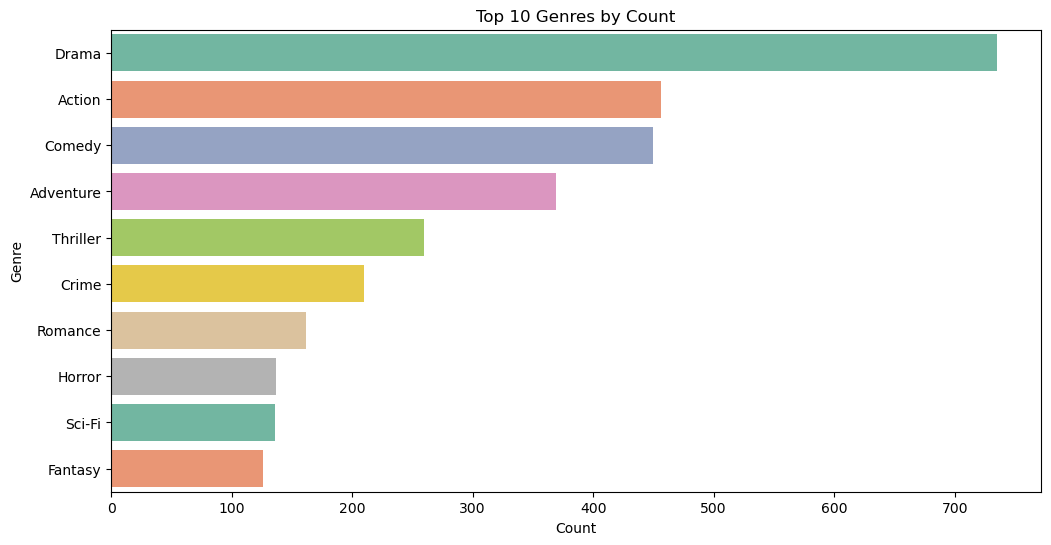

In [100]:
# Count the occurrences of each genre
genre_count = filtered_df_copy['genres'].value_counts().head(10)

# Create a bar plot for the top 10 genres by count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set2')
plt.title('Top 10 Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


Drama, Action and Comedy are the genres most produced. followed by Adventure and Thriller



Top 10 Genres by Production Budget

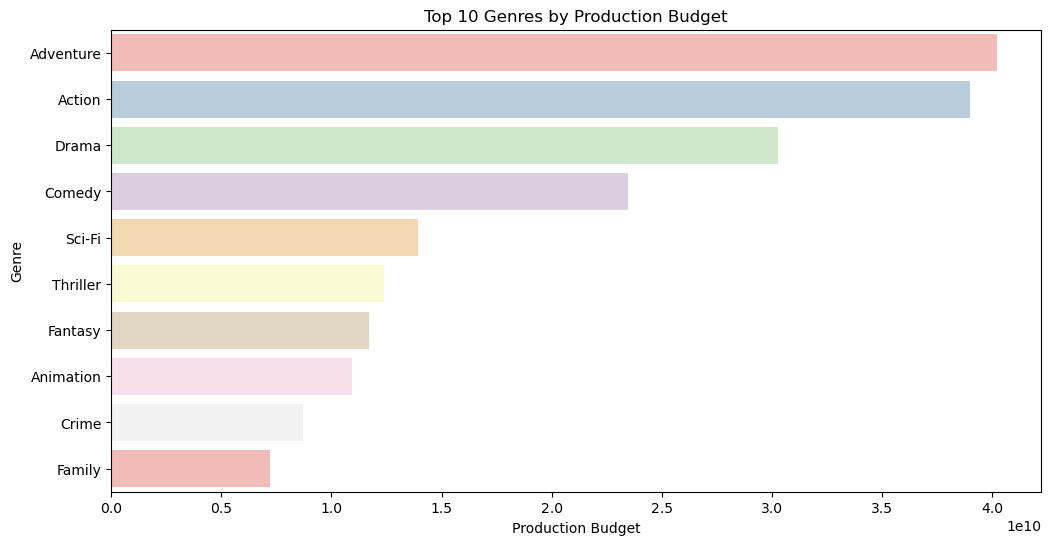

In [101]:
# Group by genre and calculate the total production budget for each genre
genre_total_budget = filtered_df_copy.groupby('genres')['production_budget'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by production budget
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_budget.values, y=genre_total_budget.index, palette='Pastel1')
plt.title('Top 10 Genres by Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Genre')
plt.show()


Adventure, Action and Drama are the genres with the highest production budget followed by Comedy and Sci-Fi

 Top 10 Genres by Worldwide Gross

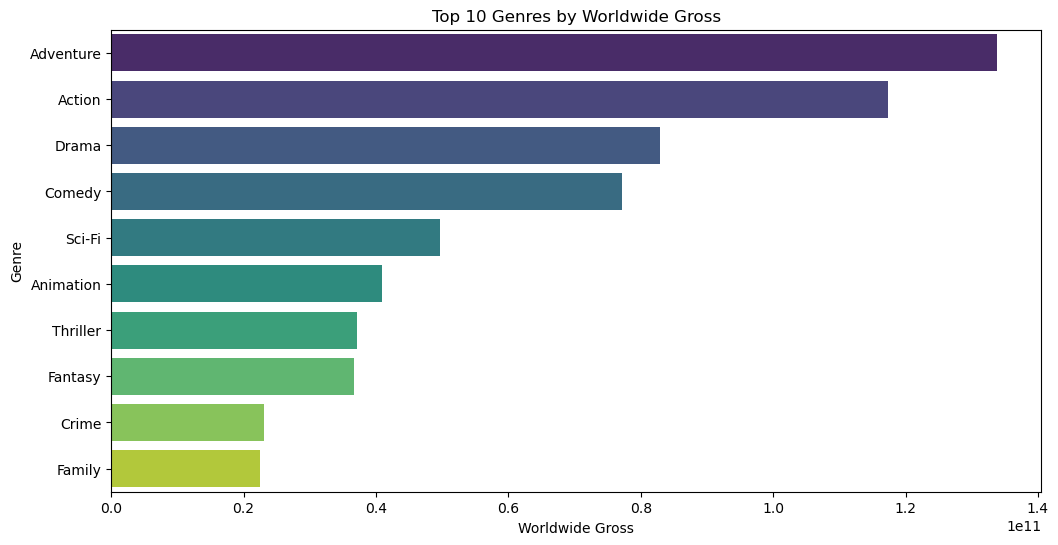

In [102]:
# Group by genre and calculate the total worldwide gross for each genre
genre_total_gross = filtered_df_copy.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by worldwide gross
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_gross.values, y=genre_total_gross.index, palette='viridis')
plt.title('Top 10 Genres by Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Genre')
plt.show()


Adventure, Action and Drama have the highest worlwide gross followed by Comedy and Sci-Fi

Top 10 Genres by Profit

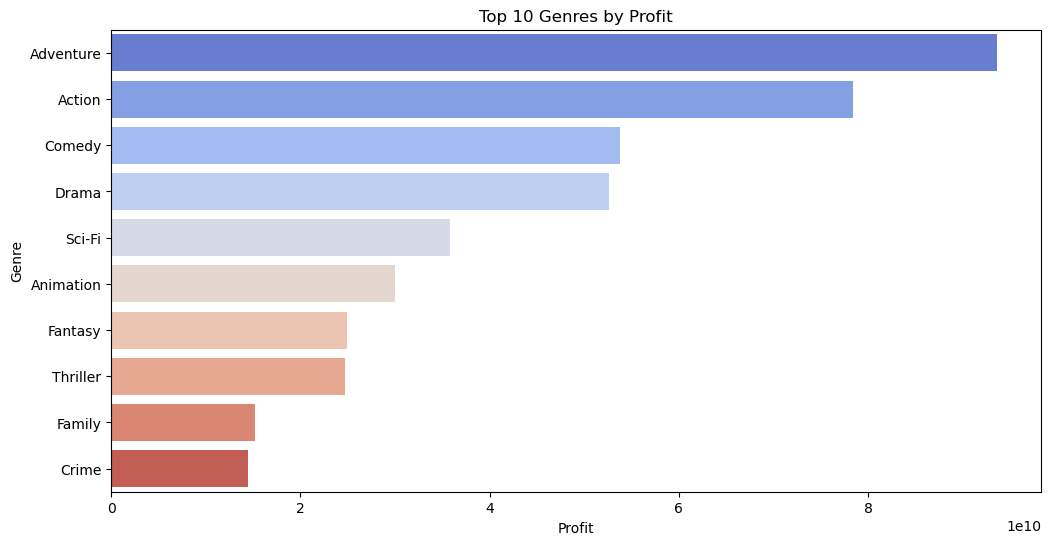

In [103]:
# Group by genre and calculate the total profit for each genre
genre_total_profit = filtered_df_copy.groupby('genres')['profit'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by profit
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_profit.values, y=genre_total_profit.index, palette='coolwarm')
plt.title('Top 10 Genres by Profit')
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.show()


Adventure, Action and Comedy produced the highest profit followed by Drama and Sci-Fi

CREATING SCATTER PLOT SHOWING THE RELATIONSHIP BETWEEN PRODUCTION BUDGET AND PROFIT

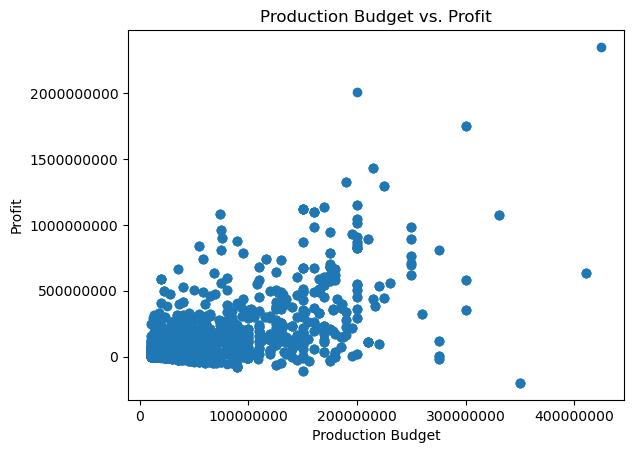

In [104]:
plt.scatter(filtered_df_copy['production_budget'], filtered_df_copy['profit'])
plt.title("Production Budget vs. Profit")
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()


The correlation between average production budget and average profit is approximately 0.58. This is positive correlation suggests that, on average, genres with higher production budgets tend to produce higher profits in my dataset.

# (6) CONCLUSION

1. GENRE INSIGHTS:

a) The genre 'Adventure' has the highest movie count, indicating its popularity among the movies we have collected.

b) Adventure' and 'Action' genres also have the highest total production budgets, suggesting that these genres often require substantial investments.

c) Adventure' and 'Action' genres, which typically involve high budgets, also lead in terms of total worldwide gross revenue, indicating their potential for generating significant box office returns.

d)Surprisingly, 'Comedy' and 'Drama' genres, despite having lower production budgets on average, have secured a place in the top 10 genres with the highest total profit. This suggests that these genres can yield favorable returns on investment.

2. PRODUCTION BUDGET AND PROFIT:

a) There is a strong positive correlation between the average production budget and average profit for different genres. Genres with higher production budgets tend to generate higher profits, reinforcing the notion that investment in production can translate into financial success.

b) While higher production budgets often lead to higher profits, careful budget management and genre-specific strategies can still result in profitable outcomes for genres with lower budgets, as exemplified by 'Comedy' and 'Drama' genres.

3. CORRELATION:

The correlation analysis confirms a positive relationship between production budget and profit. This indicates that as production budgets increase, the potential for higher profits also rises, reflecting a common trend in the film industry.








# 7 RECOMMENDATIONS

a) Prioritize the 'Adventure' and 'Action' genres due to their popularity and revenue potential. 

b) Carefully analyze the budget allocation for each project. While higher budgets can lead to higher profits, avoid overspending on genres that traditionally require lower budgets, like 'Comedy' and 'Drama.'

c)Recommendation:
Leverage the positive correlation between production budget and profit by allocating higher budgets to 'Adventure' and 'Action' projects. However, maintain a balanced portfolio by investing in lower-budget genres with strong storytelling potential.

Actionable Step:
Develop a financial strategy that allocates a percentage of the budget based on genre. For 'Adventure' and 'Action' projects, consider allocating a higher percentage of the budget to compete effectively. For 'Comedy' and 'Drama,' focus on cost-effective production and talent acquisition.